# Prices and seasonality in Seattle
## Goal:
* Use the calendar features to understand how Airbnb prices vary during the year in Seattle.

## Data:
* Clean calendar - Preprocessed calendar data from the the Data preprocessing notebook.
                 - Dataframe consisting of host IDs, availability and prices from Jan 2016 - Jan 2017

## Questions:
* How do the prices vary in the year (months and prices)
* How do the prices vary in the month (Days of the week and prices)

## Methods:
* Use the stats_description function from my_functions
* Visual inspection using matplotlib and seaborn

## Requirements:
* If not yet installed, install ipynb to use the customarized functions in the notebook

# Import the libraries & modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pickle as pkl
import folium
from folium.plugins import HeatMap
import numpy as np
%matplotlib inline

from ipynb.fs.full.my_functions import stats_description
#pip install ipynb

# Load the preprocessed data

In [2]:
df = pd.read_pickle('Seattle_data/clean_calendar.pkl')

In [3]:
df.head()

,listing_id,date,available,price,Year,Month,Day of Week
0,241032,2016-01-04,t,85.0,2016,Jan,Mon
1,241032,2016-01-05,t,85.0,2016,Jan,Tue
9,241032,2016-01-13,t,85.0,2016,Jan,Wed
10,241032,2016-01-14,t,85.0,2016,Jan,Thu
14,241032,2016-01-18,t,85.0,2016,Jan,Mon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 7 columns):
listing_id     934542 non-null int64
date           934542 non-null datetime64[ns]
available      934542 non-null object
price          934542 non-null float64
Year           934542 non-null int64
Month          934542 non-null object
Day of Week    934542 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 57.0+ MB


In [5]:
df['available'].unique()

array(['t'], dtype=object)

In [6]:
df['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [7]:
df['Day of Week'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Sun', 'Fri', 'Sat'], dtype=object)

# Prices in the week

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Fri,143.036294,111.0,107.347692,1650.0,20.0,111.0,350.0
Mon,135.676414,105.0,104.007297,1650.0,10.0,105.0,325.0
Sat,143.202136,113.0,107.441564,1650.0,20.0,113.0,350.0
Sun,136.459941,105.0,104.225783,1650.0,20.0,105.0,325.0
Thu,136.476032,105.0,104.707416,1650.0,12.0,105.0,333.0
Tue,135.408764,105.0,103.762102,1650.0,20.0,105.0,325.0
Wed,135.447880,105.0,103.555339,1650.0,20.0,105.0,325.0


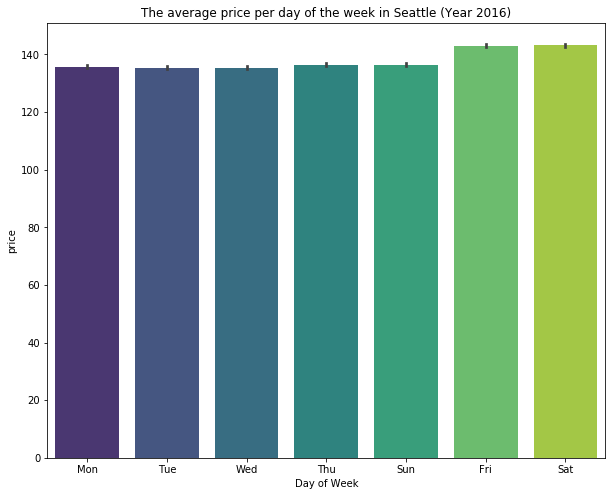

In [8]:
# Barplot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Day of Week", y="price",data=df,palette='viridis');
plt.title('The average price per day of the week in Seattle (Year 2016)');

# Pass df, col1 and col2 in the stats_description function
stats_description(df,"Day of Week","price")

## Findings:
* On avearge the prices are highest on Friday and Saturday.
 This is expected because people tend to go for weekend get-aways hence a slight increase in the demand for accomodation.
* The prices from Monday to Thursday are relatively lower and fixed compared with the former.

# Prices in the month

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Apr,135.097005,110.0,98.232098,1099.0,20.0,110.0,300.0
Aug,150.656594,114.0,118.754189,1250.0,20.0,114.0,399.0
Dec,137.251835,109.0,105.101659,1650.0,20.0,109.0,325.0
Feb,124.293927,100.0,91.550076,1000.0,20.0,100.0,275.0
Jan,122.912176,99.0,88.708143,1000.0,12.0,99.0,275.0
Jul,152.094150,115.0,120.078098,1240.0,20.0,115.0,400.0
Jun,147.473137,110.0,112.481803,1099.0,20.0,110.0,375.0
Mar,128.644488,100.0,94.371410,1099.0,20.0,100.0,285.0
May,139.538183,110.0,102.863280,1099.0,20.0,110.0,325.0
Nov,135.688738,106.0,104.264654,1650.0,10.0,106.0,315.0


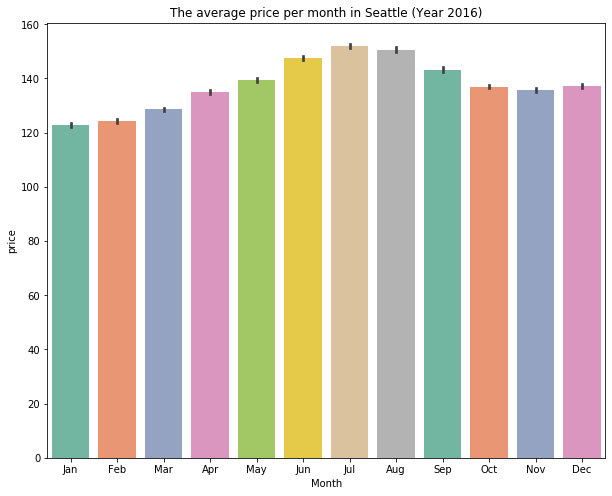

In [9]:
# Barplot
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Month", y="price",data=df,palette='Set2');
plt.title('The average price per month in Seattle (Year 2016)');

# Pass df, col1 and col2 in the stats_description function
stats_description(df,"Month","price")

## Findings:
* On average prices are highest in July. This is expected since this is the peak of the summer season.
* On average prices are lowest in January and February. 
  This is expected since these are winter months with less out-door activities and holidays hence relatively less travels and demand for accomodation.

# Prices in different years

In [10]:
stats_description(df,"Year","price")

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
2016,137.951375,109.0,105.065230,1650.0,10.0,109.0,333.00
2017,136.882590,105.0,104.681152,1000.0,20.0,105.0,345.45


## Findings
* It is hard to compare the prices in 2016 and 2017 because there is only 1 month in 2017.

# Prices on different days in relation to months

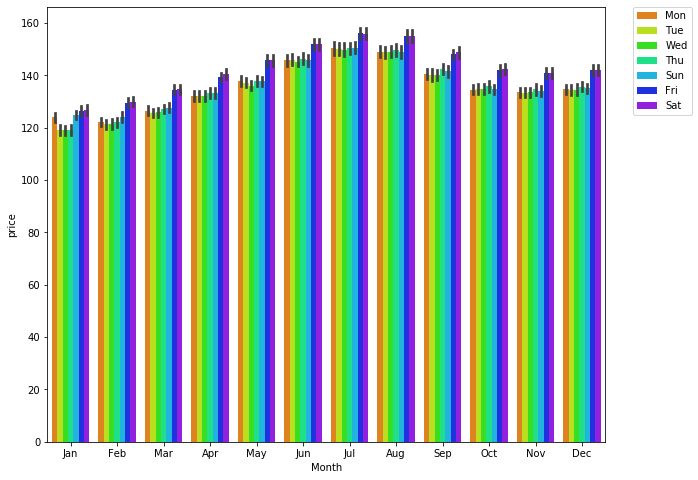

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month',y='price',data=df,hue='Day of Week',palette='gist_rainbow')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Prices in different months in relation to days

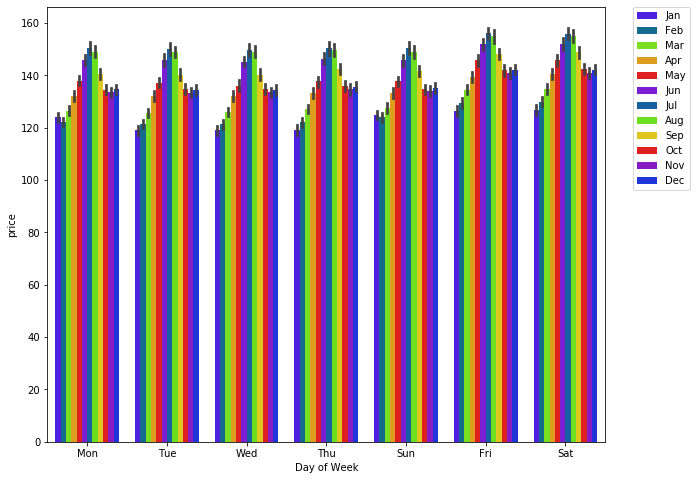

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x='Day of Week',y='price',data=df,hue='Month',palette='prism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);